<div style="text-align: center; padding: 40px 20px; background: linear-gradient(135deg, #f59e0b 0%, #d97706 100%); border-radius: 20px; margin-bottom: 30px;">
  <img src="https://fe5lpvispw.ufs.sh/f/DFYBeUqk6Uo0WMFh1daytRZp0UOYH5KfDmivgEeALPsNBawJ" alt="VISPAD logo" width="200" style="border-radius: 20px; box-shadow: 0 8px 16px rgba(0,0,0,0.3); background: white; padding: 15px; margin-bottom: 20px;">
  <h1 style="color: white; margin: 20px 0 10px 0; font-size: 2.5em; text-shadow: 2px 2px 4px rgba(0,0,0,0.2);">VISPAD Institute of Technology</h1>
</div>

<div style="background: linear-gradient(to right, #fffbeb, #fef3c7); padding: 30px; border-radius: 15px; border-left: 6px solid #f59e0b; margin-bottom: 20px;">
  <h1 style="color: #78350f; margin-bottom: 15px;">Introduction to Machine Learning: Linear Algebra</h1>
  <h2 style="color: #d97706; font-weight: 600; margin-bottom: 20px;">Lab 8: Matrix Decomposition & SVD</h2>
  
  <div style="display: flex; gap: 20px; flex-wrap: wrap;">
    <div style="background: white; padding: 15px 25px; border-radius: 10px; box-shadow: 0 2px 4px rgba(217, 119, 6, 0.2); border: 2px solid #fbbf24;">
      <strong style="color: #d97706;">📚 Semester:</strong> <span style="color: #78350f;">1</span>
    </div>
    <div style="background: white; padding: 15px 25px; border-radius: 10px; box-shadow: 0 2px 4px rgba(217, 119, 6, 0.2); border: 2px solid #fbbf24;">
      <strong style="color: #d97706;">📖 Lecture:</strong> <span style="color: #78350f;">8 (Lab session)</span>
    </div>
    <div style="background: white; padding: 15px 25px; border-radius: 10px; box-shadow: 0 2px 4px rgba(217, 119, 6, 0.2); border: 2px solid #fbbf24;">
      <strong style="color: #d97706;">⏱️ Duration:</strong> <span style="color: #78350f;">90 minutes</span>
    </div>
  </div>
</div>

---

## Learning Outcomes
By the end of this session, students should be able to:

- Understand what matrix decomposition is and why it's useful  
- Compute and interpret SVD: $A = U\Sigma V^T$  
- Connect SVD to eigendecomposition through $A^TA$ and $AA^T$  
- Apply SVD for image compression and dimensionality reduction  
- Visualize SVD as geometric transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu
%matplotlib inline

np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)

## 1️⃣ What is Matrix Decomposition?

**Matrix Decomposition** = Breaking down complex matrices into simpler components

**Analogy:** Like factoring $10 = 2 \times 5$

**Why?**
- Reveals hidden structure
- Makes computations faster  
- Enables compression & approximation

### Quick Review: LU & QR

In [2]:
# LU: A = L × U (Lower × Upper triangular)
A = np.array([[4, 3], [6, 3]], dtype=float)
P, L, U = lu(A)

print("LU Decomposition:")
print("L =", L, "\nU =", U, sep="\n")
print("\nVerify: L @ U =", L @ U)

# QR: A = Q × R (Orthogonal × Upper triangular)
Q, R = np.linalg.qr(A)
print("\nQR Decomposition:")
print("Q =", Q, "\nR =", R, sep="\n")
print("\nVerify: Q @ R =", Q @ R)

LU Decomposition:
L =
[[1.     0.    ]
 [0.6667 1.    ]]

U =
[[6. 3.]
 [0. 1.]]

Verify: L @ U = [[6. 3.]
 [4. 3.]]

QR Decomposition:
Q =
[[-0.5547 -0.8321]
 [-0.8321  0.5547]]

R =
[[-7.2111 -4.1603]
 [ 0.     -0.8321]]

Verify: Q @ R = [[4. 3.]
 [6. 3.]]


## 2️⃣ Singular Value Decomposition (SVD)

### **The Most Important Decomposition in ML!**

$$A_{m \times n} = U_{m \times m} \Sigma_{m \times n} V_{n \times n}^T$$

**Components:**
- **U**: Left singular vectors (output space rotation)
- **Σ**: Singular values (scaling)
- **V**: Right singular vectors (input space rotation)

**Geometric Meaning:** SVD = **Rotate → Stretch → Rotate**

In [3]:
# Example from lecture
A = np.array([[1, -2, 0],
              [0, -2, 1]], dtype=float)

print("Matrix A:")
print(A)
print("Shape:", A.shape)

# Compute SVD
U, s, VT = np.linalg.svd(A)

print("\n" + "="*60)
print("U (left singular vectors):", U.shape)
print(U)

print("\nSingular values σ:", s.shape)
print(s)

print("\nV^T (right singular vectors):", VT.shape)
print(VT)

Matrix A:
[[ 1. -2.  0.]
 [ 0. -2.  1.]]
Shape: (2, 3)

U (left singular vectors): (2, 2)
[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]

Singular values σ: (2,)
[3. 1.]

V^T (right singular vectors): (3, 3)
[[ 0.2357 -0.9428  0.2357]
 [-0.7071 -0.      0.7071]
 [ 0.6667  0.3333  0.6667]]


In [4]:
# Reconstruct A from SVD
Sigma = np.zeros((2, 3))
Sigma[:2, :2] = np.diag(s)

A_reconstructed = U @ Sigma @ VT
print("Reconstructed A:")
print(A_reconstructed)
print("\nError:", np.linalg.norm(A - A_reconstructed))

Reconstructed A:
[[ 1. -2.  0.]
 [-0. -2.  1.]]

Error: 7.65168414856311e-16


## 3️⃣ Visualizing SVD: Circle → Ellipse

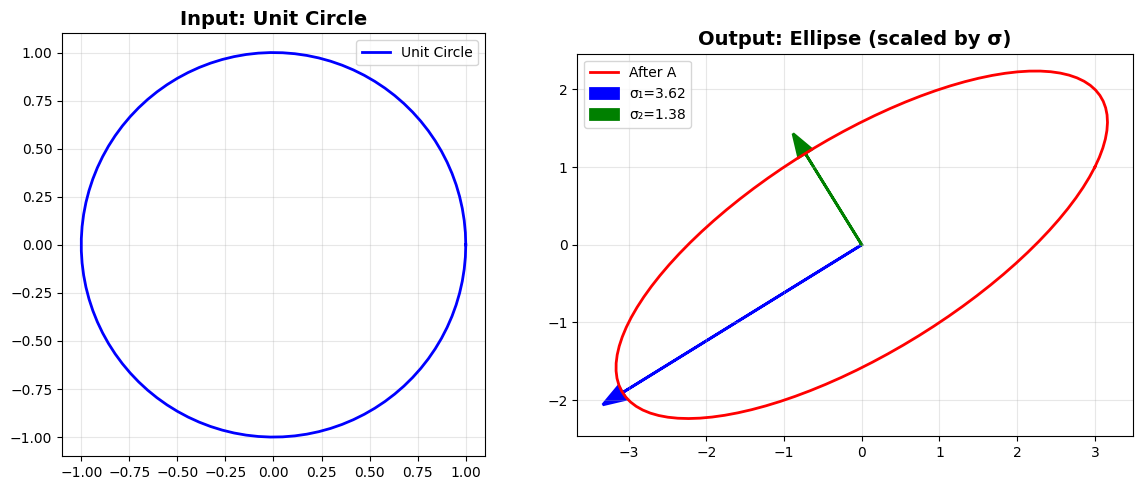

In [5]:
# Create unit circle
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])

# 2x2 matrix
A = np.array([[3, 1], [1, 2]])
U, s, VT = np.linalg.svd(A)

# Transform
ellipse = A @ circle

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(circle[0], circle[1], 'b-', linewidth=2, label='Unit Circle')
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Input: Unit Circle', fontsize=14, fontweight='bold')
axes[0].legend()

axes[1].plot(ellipse[0], ellipse[1], 'r-', linewidth=2, label='After A')
# Show singular vectors
axes[1].arrow(0, 0, U[0,0]*s[0], U[1,0]*s[0], head_width=0.2, 
              fc='blue', ec='blue', linewidth=2, label=f'σ₁={s[0]:.2f}')
axes[1].arrow(0, 0, U[0,1]*s[1], U[1,1]*s[1], head_width=0.2, 
              fc='green', ec='green', linewidth=2, label=f'σ₂={s[1]:.2f}')
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Output: Ellipse (scaled by σ)', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

## 4️⃣ The Eigendecomposition Connection

From lecture:
$$A^T A = V \Sigma^2 V^T \quad \text{and} \quad A A^T = U \Sigma^2 U^T$$

**Key insight:** Singular values = $\sqrt{\text{eigenvalues of } A^TA}$

In [6]:
A = np.array([[1, -2, 0], [0, -2, 1]], dtype=float)

# Compute A^T A
ATA = A.T @ A
print("A^T A:")
print(ATA)

# Eigendecomposition
eigenvals, eigenvecs = np.linalg.eig(ATA)
eigenvals = np.sort(eigenvals)[::-1]  # Sort descending

print("\nEigenvalues of A^T A:", eigenvals)
print("Square roots (singular values):", np.sqrt(eigenvals[eigenvals > 1e-10]))

# Compare with SVD
U, s, VT = np.linalg.svd(A)
print("\nSingular values from SVD:", s)
print("\n✓ Match!" if np.allclose(np.sqrt(eigenvals[:len(s)]), s) else "✗ Error")

A^T A:
[[ 1. -2.  0.]
 [-2.  8. -2.]
 [ 0. -2.  1.]]

Eigenvalues of A^T A: [ 9.  1. -0.]
Square roots (singular values): [3. 1.]

Singular values from SVD: [3. 1.]

✓ Match!


In [7]:
# Verify with A A^T
AAT = A @ A.T
print("A A^T:")
print(AAT)

eigenvals_AAT = np.sort(np.linalg.eigvals(AAT))[::-1]
print("\nEigenvalues of A A^T:", eigenvals_AAT)
print("Non-zero eigenvalues of A^T A:", eigenvals[:len(eigenvals_AAT)])
print("\n✓ Non-zero eigenvalues match!" if np.allclose(
    eigenvals_AAT, eigenvals[:len(eigenvals_AAT)]) else "✗ Error")

A A^T:
[[5. 4.]
 [4. 5.]]

Eigenvalues of A A^T: [9. 1.]
Non-zero eigenvalues of A^T A: [9. 1.]

✓ Non-zero eigenvalues match!


## 5️⃣ Low-Rank Approximation

**Key Application:** Keep only top k singular values!

$$A_k = \sum_{i=1}^{k} \sigma_i u_i v_i^T$$

In [8]:
# Random symmetric matrix
np.random.seed(42)
A = np.random.randn(5, 5)
A = A @ A.T

U, s, VT = np.linalg.svd(A)
print("Singular values:", s)

# Approximate with different ranks
for k in [1, 2, 3, 5]:
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error = np.linalg.norm(A - A_k, 'fro') / np.linalg.norm(A, 'fro') * 100
    print(f"Rank-{k}: {100-error:.1f}% energy, {error:.1f}% error")

Singular values: [13.2947  4.5831  3.0156  1.6838  0.0509]
Rank-1: 60.4% energy, 39.6% error
Rank-2: 76.1% energy, 23.9% error
Rank-3: 88.4% energy, 11.6% error
Rank-5: 100.0% energy, 0.0% error


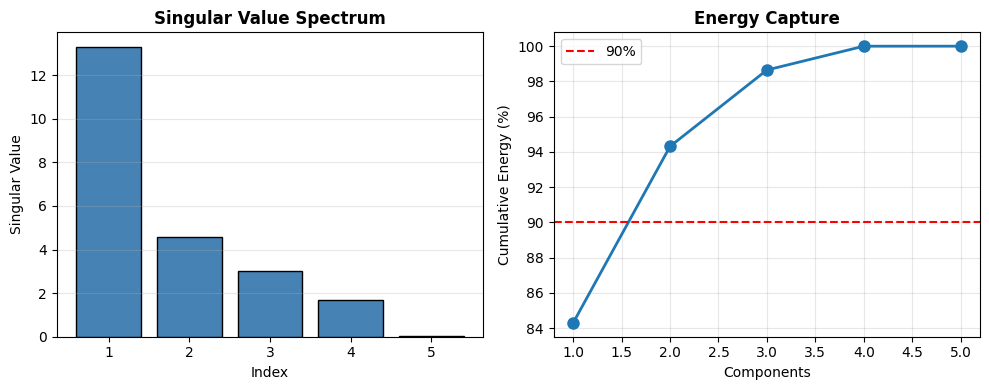

In [9]:
# Visualize energy distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(s)+1), s, color='steelblue', edgecolor='black')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Value Spectrum', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
energy = np.cumsum(s**2) / np.sum(s**2) * 100
plt.plot(range(1, len(s)+1), energy, 'o-', linewidth=2, markersize=8)
plt.axhline(90, color='r', linestyle='--', label='90%')
plt.xlabel('Components')
plt.ylabel('Cumulative Energy (%)')
plt.title('Energy Capture', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6️⃣ Image Compression with SVD

In [10]:
# Create synthetic image
x = np.linspace(-3, 3, 150)
y = np.linspace(-3, 3, 150)
X, Y = np.meshgrid(x, y)
img = np.sin(X) * np.cos(Y) + 0.1*np.random.randn(150, 150)
img = (img - img.min()) / (img.max() - img.min())

# SVD
U, s, VT = np.linalg.svd(img, full_matrices=False)

print(f"Image: {img.shape}")
print(f"Singular values: {len(s)}")

Image: (150, 150)
Singular values: 150


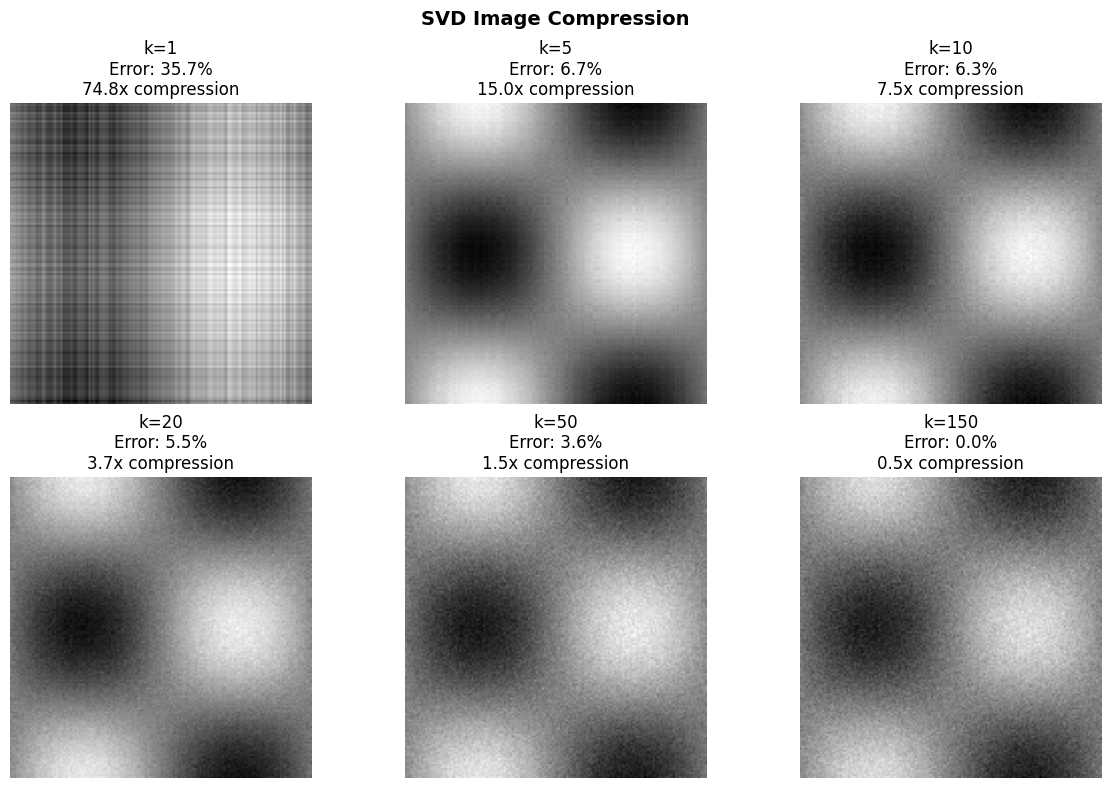

In [11]:
# Compress at different ranks
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()
ranks = [1, 5, 10, 20, 50, 150]

for i, k in enumerate(ranks):
    img_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error = np.linalg.norm(img - img_k) / np.linalg.norm(img) * 100
    ratio = img.size / (k * (U.shape[0] + VT.shape[1] + 1))
    
    axes[i].imshow(img_k, cmap='gray')
    axes[i].set_title(f'k={k}\nError: {error:.1f}%\n{ratio:.1f}x compression')
    axes[i].axis('off')

plt.suptitle('SVD Image Compression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 7️⃣ Real Example: Working Through Lecture Problem

Let's verify the lecture example step-by-step!

In [12]:
# From lecture
A = np.array([[1, -2, 0],
              [0, -2, 1]], dtype=float)

# Step 1: Compute A^T A
ATA = A.T @ A
print("Step 1: A^T A =")
print(ATA)

# Step 2: Find eigenvalues/vectors
eigenvals, V = np.linalg.eig(ATA)
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
V = V[:, idx]

print("\nStep 2: Eigenvalues =", eigenvals)
print("Singular values σ = √λ =", np.sqrt(eigenvals[eigenvals > 1e-10]))

# Step 3: Compute U from AV = UΣ
sigma_vals = np.sqrt(eigenvals[eigenvals > 1e-10])
U = np.zeros((2, 2))
for i in range(len(sigma_vals)):
    U[:, i] = (A @ V[:, i]) / sigma_vals[i]

print("\nStep 3: U =")
print(U)

# Verify
Sigma = np.zeros((2, 3))
Sigma[:2, :2] = np.diag(sigma_vals)
A_check = U @ Sigma @ V.T

print("\nVerification: U Σ V^T =")
print(A_check)
print("\nMatch original?", np.allclose(A, A_check))

Step 1: A^T A =
[[ 1. -2.  0.]
 [-2.  8. -2.]
 [ 0. -2.  1.]]

Step 2: Eigenvalues = [ 9.  1. -0.]
Singular values σ = √λ = [3. 1.]

Step 3: U =
[[-0.7071 -0.7071]
 [-0.7071  0.7071]]

Verification: U Σ V^T =
[[ 1. -2.  0.]
 [ 0. -2.  1.]]

Match original? True


## Summary & Key Takeaways

### SVD Formula:
$$A = U \Sigma V^T$$

### How to Compute:
1. Find V from eigenvectors of $A^TA$
2. Singular values: $\sigma_i = \sqrt{\lambda_i}$
3. Find U from eigenvectors of $AA^T$ (or $U = AV\Sigma^{-1}$)

### Applications:
- Image compression
- Dimensionality reduction (PCA)
- Recommender systems
- Data denoising

### In Practice:
```python
U, s, VT = np.linalg.svd(A)  # Always use this!
```

## Mini Exercises

1. **Compute by hand:** Find SVD of $\begin{bmatrix}3 & 0\\0 & 2\end{bmatrix}$

2. **Rank approximation:** Create a 10×10 random matrix and find the minimum rank needed to capture 95% energy

3. **Image compression:** What compression ratio gives <10% error?

4. **Challenge:** Implement your own SVD using $A^TA$ eigendecomposition

---

**End of Lab 8**  
**VISPAD Institute of Technology**